In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=84c650df6416a325b4eaf6981d5a2e88b7160720628cbcc13a57c219a85aed35
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

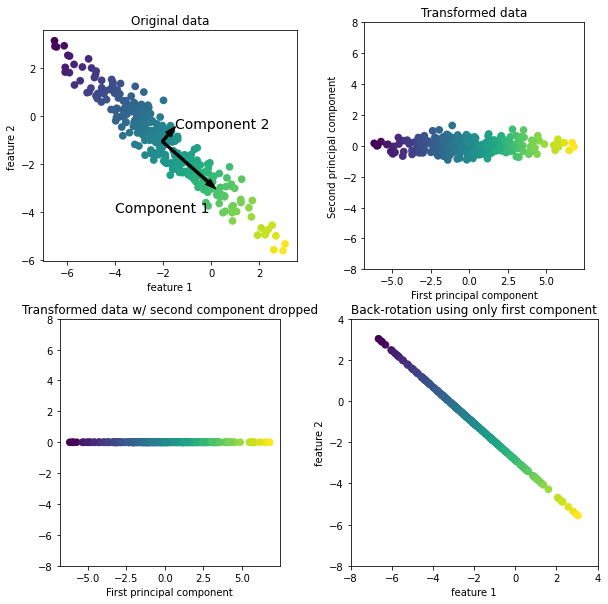

In [3]:
# Ilustración PCA análisis
mglearn.plots.plot_pca_illustration()

In [7]:
# Carga de información
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# Entrenamiento PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# Transformar la información mediante PCA
transformada = pca.transform(cancer.data)

In [9]:
# Comparar las estructuras
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'PCA 2')

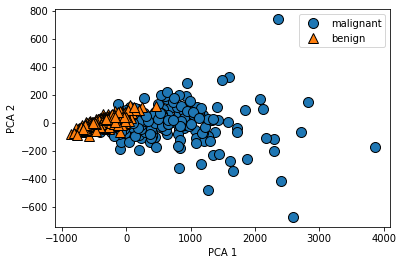

In [11]:
# Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

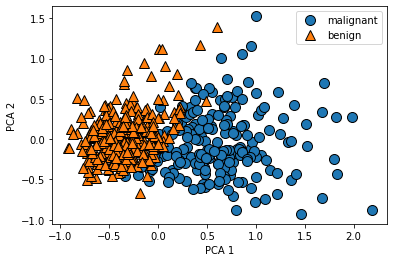

In [12]:
from sklearn.preprocessing import MinMaxScaler
# Escalar información
escala = MinMaxScaler() 
escala.fit(cancer.data)
escalada = escala.transform(cancer.data)
# Entrenar PCA con la data escalada
pca.fit(escalada)
# Transformar la información mediante PCA
transformada = pca.transform(escalada)
# Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [13]:
!pip install factor_analyzer==0.2.3

In [14]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

In [15]:
df_cancer = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
# p_value < 0.05 - OK
chi_square_value, p_value = calculate_bartlett_sphericity(df_cancer)
chi_square_value, p_value

(39362.1208411325, 0.0)

In [18]:
kmo_all, kmo_model = calculate_kmo(df_cancer)
kmo_model

0.8322253094685931

In [19]:
fa = FactorAnalyzer()
fa.analyze(df_cancer, 25, rotation = None)
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,13.281608
1,5.691355
2,2.817949
3,1.980640
4,1.648731
5,1.207357
6,0.675220
7,0.476617
8,0.416895
9,0.350693


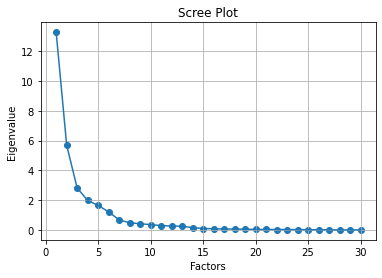

In [20]:
plt.scatter(range(1,df_cancer.shape[1]+1),ev)
plt.plot(range(1,df_cancer.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [21]:
fa = FactorAnalyzer()
fa.analyze(df_cancer, 6, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
mean radius,0.955626,0.056451,-0.168382,0.101762,-0.014287,0.018811
mean texture,0.255512,0.078682,0.096211,0.860222,-0.026154,0.006695
mean perimeter,0.955334,0.097439,-0.158442,0.103484,0.016640,0.035256
mean area,0.970989,0.053349,-0.091867,0.088514,-0.007131,0.004348
mean smoothness,0.202996,0.180879,0.212796,-0.100938,0.809162,0.171657
mean compactness,0.472758,0.601982,-0.020797,0.079250,0.490245,0.269827
mean concavity,0.658361,0.588161,-0.013579,0.111966,0.310553,0.172569
mean concave points,0.810901,0.340175,-0.017527,0.077629,0.348497,0.149176
mean symmetry,0.164550,0.280907,0.193745,-0.017114,0.364989,0.604787
mean fractal dimension,-0.294971,0.579556,0.212812,-0.066236,0.556485,0.190974


In [22]:
df_factores = fa.loadings
df_factores

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
mean radius,0.955626,0.056451,-0.168382,0.101762,-0.014287,0.018811
mean texture,0.255512,0.078682,0.096211,0.860222,-0.026154,0.006695
mean perimeter,0.955334,0.097439,-0.158442,0.103484,0.016640,0.035256
mean area,0.970989,0.053349,-0.091867,0.088514,-0.007131,0.004348
mean smoothness,0.202996,0.180879,0.212796,-0.100938,0.809162,0.171657
mean compactness,0.472758,0.601982,-0.020797,0.079250,0.490245,0.269827
mean concavity,0.658361,0.588161,-0.013579,0.111966,0.310553,0.172569
mean concave points,0.810901,0.340175,-0.017527,0.077629,0.348497,0.149176
mean symmetry,0.164550,0.280907,0.193745,-0.017114,0.364989,0.604787
mean fractal dimension,-0.294971,0.579556,0.212812,-0.066236,0.556485,0.190974


In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
ruta = '/content/drive/My Drive/MDD/Clase6 - TICs - PFigueroa/'

In [26]:
df_factores.to_excel(ruta + 'Factores.xlsx')